C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Abeer AL-Talib\AppData\Roaming\Python\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so

10.94839681514956


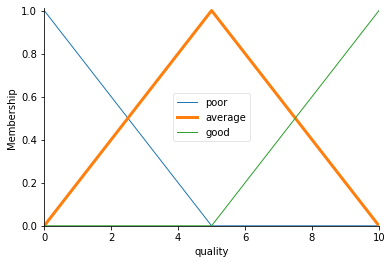

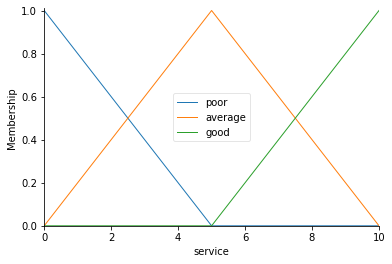

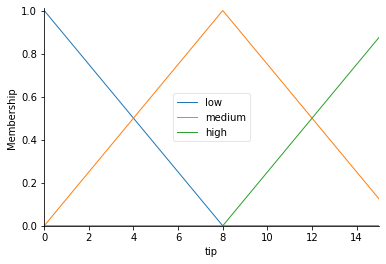

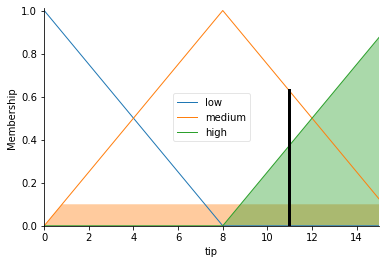

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
# two varibles affect the value of the tip ,and each has its own range
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 16, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

# transforms the system inputs, which are crisp numbers, into fuzzy sets.
# tranglemebmbeship
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 8])
tip['medium'] = fuzz.trimf(tip.universe, [0, 8, 16])
tip['high'] = fuzz.trimf(tip.universe, [8, 16, 16])

# You can see how these look with .view()
quality['average'].view()
service.view()
tip.view()


# Fuzzy rules

rule1 = ctrl.Rule(quality['poor']     | service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average']  & service['poor'], tip['low'])
rule3 = ctrl.Rule(quality['average']  & service['average'] , tip['medium'])
rule4 = ctrl.Rule(quality['average']  & service['good'], tip['medium'])
rule5= ctrl.Rule(quality['good']      & service['good'], tip['high'])


# control system creation and simulation
# It simulates the human reasoning process by makingfuzzy inference on the inputs and IF-THEN rules.
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)


# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 9.5
tipping.input['service'] = 9.5

# Crunch the numbers
tipping.compute()

print (tipping.output['tip'])
tip.view(sim=tipping)
